# Homework 2 - Soccer analytics


In [2]:
#We import the necessary libraries to organize data and plot the Premier League ranking 2017/2018.
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\Matches\matches_England.json', 'r') as file:
    data = file.read()
matches = json.loads(data)
matches = pd.DataFrame(matches)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Notebook HP\\Desktop\\Homeworks\\HW2\\Matches\\matches_England.json'

In [ ]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\teams.json', 'r') as teams:
    data = teams.read()
teams = json.loads(data)
teams = pd.DataFrame(teams)


In [ ]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\players.json', 'r') as myfile:
    data = myfile.read()
play = json.loads(data)
players = pd.DataFrame(play)


In [4]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\Events\events_Spain.json', 'r') as myfile:
    data = myfile.read()
e = json.loads(data)
events = pd.DataFrame(e)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Notebook HP\\Desktop\\Homeworks\\HW2\\Events\\events_Spain.json'

# Exploratory Data Analysis
All the analysis from RQ1 to RQ5, are performed only over the Premier League dataset.

# [RQ1] Who wants to be a Champion?


### Create a plot where each point (x,y) represents the number of points obtained by team x at game week y.
For this task, we need the dataframes matches and teams.
In this exploratory data analysis (RQ1 - RQ5), we will use only the datasets relative to the Premier League season 2017/2018.

We load the 'matches_England' and 'teams' json files, and produce the pandas dataframe

In [119]:
matches.head()

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Burnley - AFC Bournemouth, 1 - 2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",Turf Moor,1659,2500089
1,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Crystal Palace - West Bromwich Albion, 2 - 0","[{'refereeId': 381851, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",Selhurst Park,1628,2500090
2,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Huddersfield Town - Arsenal, 0 - 1","[{'refereeId': 384965, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",The John Smith's Stadium,1609,2500091
3,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Liverpool - Brighton & Hove Albion, 4 - 0","[{'refereeId': 385704, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",Anfield,1612,2500092
4,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Manchester United - Watford, 1 - 0","[{'refereeId': 381853, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",Old Trafford,1611,2500093


In [120]:
teams.head()

,area,city,name,officialName,type,wyId
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
1,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vigo,Celta de Vigo,Real Club Celta de Vigo,club,692
2,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Barcelona,Espanyol,Reial Club Deportiu Espanyol,club,691
3,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vitoria-Gasteiz,Deportivo Alav\u00e9s,Deportivo Alav\u00e9s,club,696
4,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Valencia,Levante,Levante UD,club,695


#### Create a dataframe of all the Premier League teams
We will produce a new dataframe 'english' from 'teams' to get rid of all the useless information, keeping only the rows with area tag {'name': 'England'}

In [121]:
english = teams[teams['area'] == {"name": "England", "id": "0", "alpha3code": "XEN", "alpha2code": ""}]
english.head()

,area,city,name,officialName,type,wyId
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
8,"{'name': 'England', 'id': '0', 'alpha3code': '...","Huddersfield, West Yorkshire",Huddersfield Town,Huddersfield Town FC,club,1673
26,"{'name': 'England', 'id': '0', 'alpha3code': '...","Bournemouth, Dorset",AFC Bournemouth,AFC Bournemouth,club,1659
27,"{'name': 'England', 'id': '0', 'alpha3code': '...","Brighton, East Sussex",Brighton & Hove Albion,Brighton & Hove Albion FC,club,1651
39,"{'name': 'England', 'id': '0', 'alpha3code': '...","Burnley, Lancashire",Burnley,Burnley FC,club,1646


In [122]:
len(english.index) #Counting the rows

19

Here we notice that the teams are only 19, instead of 20, which means that there must be another Premier League team with a different area tag.

In fact, looking at the official list of English teams, we notice that Swansea City is missing.

In [123]:
# We search for a team with 'name' value 'Swansea City'
sw = teams.loc[teams['name'] == 'Swansea City']
sw

,area,city,name,officialName,type,wyId
19,"{'name': 'Wales', 'id': '0', 'alpha3code': 'XW...",Swansea,Swansea City,Swansea City AFC,club,10531


There it is. So we can add it to our english dataframe.

In [124]:
english = english.append(sw)
english

,area,city,name,officialName,type,wyId
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
8,"{'name': 'England', 'id': '0', 'alpha3code': '...","Huddersfield, West Yorkshire",Huddersfield Town,Huddersfield Town FC,club,1673
26,"{'name': 'England', 'id': '0', 'alpha3code': '...","Bournemouth, Dorset",AFC Bournemouth,AFC Bournemouth,club,1659
27,"{'name': 'England', 'id': '0', 'alpha3code': '...","Brighton, East Sussex",Brighton & Hove Albion,Brighton & Hove Albion FC,club,1651
39,"{'name': 'England', 'id': '0', 'alpha3code': '...","Burnley, Lancashire",Burnley,Burnley FC,club,1646
54,"{'name': 'England', 'id': '0', 'alpha3code': '...",Leicester,Leicester City,Leicester City FC,club,1631
55,"{'name': 'England', 'id': '0', 'alpha3code': '...",London,West Ham United,West Ham United FC,club,1633
56,"{'name': 'England', 'id': '0', 'alpha3code': '...",Stoke-on-Trent,Stoke City,Stoke City FC,club,1639
60,"{'name': 'England', 'id': '0', 'alpha3code': '...",Watford,Watford,Watford FC,club,1644
65,"{'name': 'England', 'id': '0', 'alpha3code': '...",Liverpool,Everton,Everton FC,club,1623


We create a dataframe with only the columns 'name' and 'wyId', that are what we need to complete our task.

In [125]:
Engteam = pd.DataFrame(english['name'])
Engteam['code'] = english['wyId']
Engteam = Engteam.sort_values('code') #sorting values by 'code'
Engteam = Engteam.reset_index(drop=True) #reindexing

Engteam.head()

,name,code
0,Arsenal,1609
1,Chelsea,1610
2,Manchester United,1611
3,Liverpool,1612
4,Newcastle United,1613


From the dataframe 'matches' we only need the 'gameweek' and 'winner' columns, so we create the Premier dataframe.

In [126]:
Premier = pd.DataFrame(matches['gameweek'])
Premier['winner'] = matches['winner']
Premier['result'] = matches['label']
Premier = Premier.sort_values('gameweek')
Premier = Premier.reset_index(drop=True)

Premier[:8]

,gameweek,winner,result
0,1,1609,"Arsenal - Leicester City, 4 - 3"
1,1,1611,"Manchester United - West Ham United, 4 - 0"
2,1,1624,"Newcastle United - Tottenham Hotspur, 0 - 2"
3,1,1625,"Brighton & Hove Albion - Manchester City, 0 - 2"
4,1,1646,"Chelsea - Burnley, 2 - 3"
5,1,0,"Watford - Liverpool, 3 - 3"
6,1,1623,"Everton - Stoke City, 1 - 0"
7,1,0,"Southampton - Swansea City, 0 - 0"


So in the 'gameweek' column we can see the week where the match was disputed, and in 'winner' the wyId code of the winning team. It's worth of notice that if there's a draw the code value is 0.

#### Creating the ranking with all the points of each team during the 38 weeks of the season.

We start by adding 38 week columns to the Engteam dataframe.

In [127]:
for i in range(1,39):
    Engteam['week {}'.format(i)] = 0
Engteam.head()

,name,code,week 1,week 2,week 3,week 4,week 5,week 6,week 7,week 8,...,week 29,week 30,week 31,week 32,week 33,week 34,week 35,week 36,week 37,week 38
0,Arsenal,1609,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chelsea,1610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Manchester United,1611,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Liverpool,1612,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Newcastle United,1613,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
#Creating copy dataframes to avoid damaging the original ones
E = Engteam.copy()
P = Premier.copy()

Now we are ready to complete the E dataframe with all the results.

In [129]:
for i in range(380): #There are 380 total matches in the league.
    if P['winner'][i] != 0: #If there is not a draw
        
        #Adding 3 as value if the wyId code is the same as the 'winner' code in P
        E.loc[E['code'] == P['winner'][i], ['week {}'.format(P['gameweek'][i])]] = 3
        
    else:
        for j in range(20):
            
            if E['name'][j] in P['result'][i]:#If the team name is in the 'result' value
                E.at[j, 'week {}'.format(P['gameweek'][i])] = 1
E

,name,code,week 1,week 2,week 3,week 4,week 5,week 6,week 7,week 8,...,week 29,week 30,week 31,week 32,week 33,week 34,week 35,week 36,week 37,week 38
0,Arsenal,1609,3,0,0,3,1,3,3,0,...,0,3,0,3,3,0,3,0,3,3
1,Chelsea,1610,0,3,3,3,1,3,0,0,...,0,3,3,0,1,3,1,3,3,0
2,Manchester United,1611,3,3,3,1,3,3,3,1,...,3,3,1,3,3,0,3,3,0,3
3,Liverpool,1612,1,3,3,0,1,3,1,1,...,3,0,3,3,1,3,1,1,0,3
4,Newcastle United,1613,0,0,3,3,3,0,1,1,...,0,3,0,3,3,3,0,0,0,3
5,Southampton,1619,1,3,1,0,3,0,0,1,...,1,0,3,0,0,0,1,3,1,0
6,Everton,1623,3,1,0,0,0,3,0,1,...,0,1,3,0,1,1,3,3,1,0
7,Tottenham Hotspur,1624,3,0,1,3,1,3,3,3,...,3,3,3,3,3,0,1,3,0,3
8,Manchester City,1625,3,1,3,3,3,3,3,3,...,3,3,3,3,0,3,3,3,1,3
9,West Bromwich Albion,1627,3,3,1,0,1,0,1,1,...,0,0,0,0,1,3,1,3,3,0


#### Creating the plot

In [130]:
E = E.loc[:, 'week 1':] #we remove the 'names' and 'code' columns, we don't need them anymore


Now, we need to list of the result of each team so that we can sum them and plot the summed result of each team.

In [131]:
Graf = E.values.tolist()
Grafv = list(Graf)


In [132]:
for i in range(20):
    for j in range(1,38):
        Grafv[i][j] = Graf[i][j-1] + Graf[i][j] #Summing every week result with the past ones


We can finally plot. 

In [193]:
wg = []
for i in range(1,39):
    wg.append('{}'.format(i)) # x ticks of every week

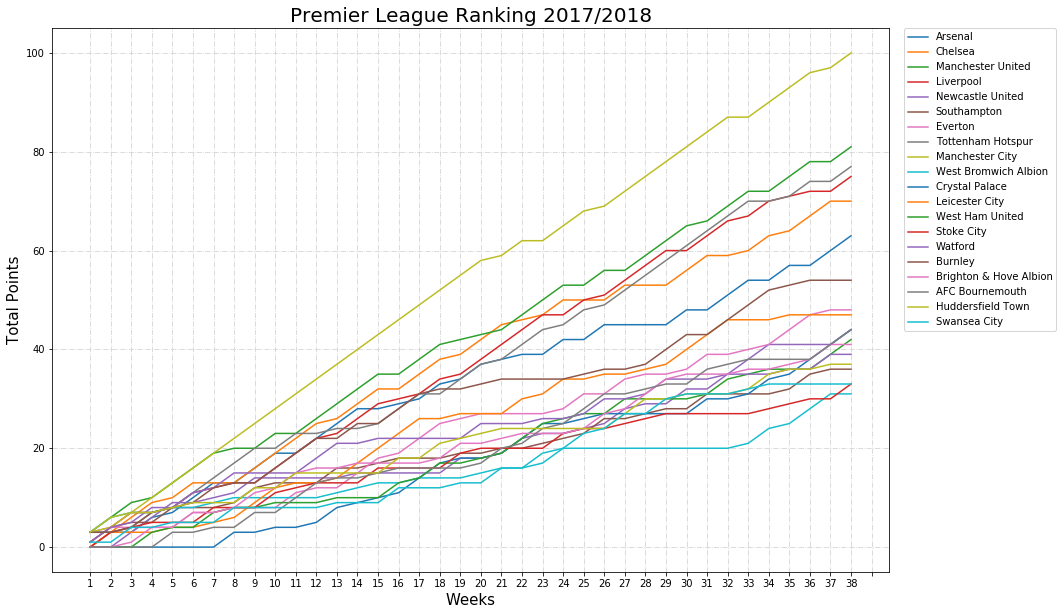

In [194]:
plt.figure(figsize=(15,10))
for i in range(20):
    plt.plot(Grafv[i], label = Engteam['name'][i])
    
plt.xticks(range(0,39),wg, size = 10)
plt.ylabel("Total Points", size = 15)
plt.xlabel("Weeks", size = 15)
plt.grid(color ='lightgray', linestyle = '-.')
plt.title('Premier League Ranking 2017/2018', size = 20)

plt.legend(loc='center right',bbox_to_anchor=(1.20,0.7211), borderaxespad=0,prop={'size': 10});

#### Finding the two best and worst teams

We now define a function to find the teams with most consecutive wins and losses. 

In [195]:
def bestornot(n):
    r = E.values.tolist()
    for i in range(len(r)):
        r[i] = [str(x) if x == n else ' ' for x in r[i]] #everything different from n becomes a space ' '
        r[i] = ''.join(r[i])#getting rid of spaces
        r[i] = r[i].split()#creating the list r[i] modified
        r[i] = max(r[i])#choosing the max value in r[i]
    
    return r


In [196]:
bestornot(3)#most consecutive wins for team in the season

['333',
 '3333',
 '3333',
 '3333',
 '333',
 '3',
 '33',
 '3333333',
 '333333333333333333',
 '33',
 '333',
 '3333',
 '33',
 '3',
 '33',
 '333',
 '33',
 '33',
 '33',
 '33']

In [197]:
Engteam.at[8, 'name']#best team

'Manchester City'

In [198]:
Engteam.at[7, 'name']#second best

'Tottenham Hotspur'

Now, we can do the same with losses:

In [199]:
bestornot(0)#most consecutive losses for team in the season

['000',
 '00',
 '0',
 '0',
 '0000',
 '000',
 '000',
 '0',
 '0',
 '00000000',
 '0000000',
 '000',
 '000',
 '0000',
 '0000',
 '000',
 '000',
 '0000',
 '00000',
 '0000']

In [200]:
Engteam.at[9,'name']#worst team

'West Bromwich Albion'

In [201]:
Engteam.at[10,'name']#second worst

'Crystal Palace'

# [RQ2] Is there a home-field advantage?

In [1]:
matches
#let's watch our dataframe

NameError: name 'matches' is not defined

In [ ]:
matches.columns

In [ ]:
workingData = matches['label']
workingData.head()
#we are interested in label because it gives the info of the teams that were playing and the result of the game

I will split this columns in teams and result to have a better view and accessibility of the info in every row.

In [ ]:
wkd = pd.DataFrame(workingData)
wkd.head()

In [ ]:
new = wkd["label"].str.split(",", n = 1, expand = True)
new.head()
#I created a table with the match and the result, now I can split for HomeMatch and NotHomeMatch

In [ ]:
new.rename(columns = {0 :'Match',1 :'Result'}, inplace = True)

In [ ]:
new.columns

In [ ]:
Mtc = new["Match"].str.split("-", n = 1, expand = True)
Mtc.head()
#the teams

In [ ]:
Rst = new["Result"].str.split("-", n = 1, expand = True)
Rst.head()
#the goals

In [ ]:
alldata = pd.DataFrame({'Home':Mtc[0], 'ResH':Rst[0], 'ResNH':Rst[1],'Nhome':Mtc[1]})
alldata.head()
#this is the dataframe I wanted to organize

Now I try to find the Winner, or Draw, for every Match, so I can add this to my previous table in a column called 'Winner'

In [ ]:
l = []
for i in range(len(alldata)):
    a = int(alldata.loc[i,'ResH'])
    b = int(alldata.loc[i,'ResNH'])
    #print(a,b)
    if a==b:
       # print('1')
        l.append('Draw')
    elif a>b:
        l.append(alldata.loc[i,'Home'])
       #print('2')
    elif a<b:
        l.append(alldata.loc[i,'Nhome'])
       # print('3')
    
l

In [ ]:
alldata['Winner']=l

Here it is the table that i was building.

In [ ]:
alldata.reset_index(drop=True)

Now I use the teams dataset

In [ ]:
teams.head()

To be casual in my indipendence test I'll take out 5 random team from the english teams, so I start from taking out every team in a column and then extract 5 casual numbers that will be the row of the casually selected team.

In [ ]:
data = teams[teams['area'] == {"name": "England", "id": "0", "alpha3code": "XEN", "alpha2code": ""}]

In [ ]:
data.head()

In [ ]:
teams = data['name']

In [ ]:
teams

In [ ]:
allteams = (pd.DataFrame(teams)).reset_index(drop=True)
allteams

I select 5 random teams

In [ ]:
import random
selected_teams = random.sample(range(19),5)
selected_teams

In [ ]:
These are my teams:

In [ ]:
B = []
for i in selected_teams:
    B.append(str(allteams.loc[i,'name']))
B

## For 5 different teams of Premier League, show the contingency table (outcome x side).

Here I'll illustrate the process to create a contingency table for the first team, for the others there is a cell with the compact code of this procedure

In [ ]:
home = alldata[alldata['Home'].str.contains(B[0])]
home
#I select the rows that have in home the team that I have to analyze

In [ ]:
not_home = alldata[alldata['Nhome'].str.contains(B[0])]
alldata[alldata['Nhome'].str.contains(B[0])]
#I select the rows that have in Nhome the team that I have to analyze

In [ ]:
home['Winner'].str.replace(" ","")
not_home['Winner'].str.replace(" ","")
home

Now i create 6 values indicating the number of wins, losses or draws playing at home or not home.

In [ ]:
Whome = len(home[home['Winner'].str.contains(B[0])])
#Whome
Dhome = len(home[home['Winner'].str.contains('Draw')])
#NWhome
Lhome = len(home)-Whome-Dhome
#print(Whome,Dhome,Lhome)

In [ ]:
Wout = len(not_home[not_home['Winner'].str.contains(B[0])])
#Whome
Dout = len(not_home[not_home['Winner'].str.contains('Draw')])
#NWhome
Lout = len(not_home)-Wout-Dou

In [ ]:
W = np.array([Whome,Wout, Whome + Wout],dtype = object)
L = np.array([Lhome,Lout, Lhome+Lout],dtype = object)
D = np.array([Dhome,Dout, Dhome+Dout],dtype = object)
T = np.array([Whome+Lhome+Dhome,Wout+Lout+Dout,Whome+Lhome+Dhome+Wout+Lout+Dout],dtype = object)

In [ ]:
raw_data = {'Win':W, 'Loss':L,'Draw':D, 'Total':T}

In [ ]:
Sa = pd.DataFrame(raw_data, index = pd.Index(['Home','Not Home','Total'], name = str(B[0])))

In [ ]:
Sa
#this is the table for the first team

As I said here I'll do the same for the five teams in a for loop, later are diplayed the tables for every team.

In [ ]:
Sa = []
for i in range(0,5):
    home = alldata[alldata['Home'].str.contains(B[i])]
    not_home = alldata[alldata['Nhome'].str.contains(B[i])]
    home['Winner'].str.replace(" ","")
    not_home['Winner'].str.replace(" ","")
    Whome = len(home[home['Winner'].str.contains(B[i])])
#Whome
    Dhome = len(home[home['Winner'].str.contains('Draw')])
#NWhome
    Lhome = len(home)-Whome-Dhome
    Wout = len(not_home[not_home['Winner'].str.contains(B[i])])
#Whome
    Dout = len(not_home[not_home['Winner'].str.contains('Draw')])
#NWhome
    Lout = len(not_home)-Wout-Dout
    W = np.array([Whome,Wout, Whome + Wout],dtype = object)
    L = np.array([Lhome,Lout, Lhome+Lout],dtype = object)
    D = np.array([Dhome,Dout, Dhome+Dout],dtype = object)
    T = np.array([Whome+Lhome+Dhome,Wout+Lout+Dout,Whome+Lhome+Dhome+Wout+Lout+Dout],dtype = object)
    raw_data = {'Win':W, 'Loss':L,'Draw':D, 'Total':T}
    Sa.append(pd.DataFrame(raw_data, index = pd.Index(['Home','Not Home','Total'], name = str(B[i]))))

In [ ]:
Sa[0]
#1st team

In [ ]:
Sa[1]
#2nd team

In [ ]:
Sa[2]
#3rd team

In [ ]:
Sa[3]
#4th team

In [ ]:
Sa[4]
#5th team

## Second part-X^2 test

I start saving the results of everyone of the 5 teams without intersections with each other, then create a unique contingency table with the summed values.

In [ ]:
print(B)

In [ ]:
alldata.head()

In [ ]:
alldata1 = alldata[~alldata['Home'].str.contains(B[1])]
alldata1 = alldata1[~alldata1['Home'].str.contains(B[2])]
alldata1 = alldata1[~alldata1['Home'].str.contains(B[3])]
alldata1 = alldata1[~alldata1['Home'].str.contains(B[4])]
alldata1 = alldata1[~alldata1['Nhome'].str.contains(B[1])]
alldata1 = alldata1[~alldata1['Nhome'].str.contains(B[2])]
alldata1 = alldata1[~alldata1['Nhome'].str.contains(B[3])]
alldata1 = alldata1[~alldata1['Nhome'].str.contains(B[4])]
alldata1
#the dataset from which I take the results of team 1

In [ ]:
alldata2 = alldata[~alldata['Home'].str.contains(B[0])]
alldata2 = alldata2[~alldata2['Home'].str.contains(B[2])]
alldata2 = alldata2[~alldata2['Home'].str.contains(B[3])]
alldata2 = alldata2[~alldata2['Home'].str.contains(B[4])]
alldata2 = alldata2[~alldata2['Nhome'].str.contains(B[0])]
alldata2 = alldata2[~alldata2['Nhome'].str.contains(B[2])]
alldata2 = alldata2[~alldata2['Nhome'].str.contains(B[3])]
alldata2 = alldata2[~alldata2['Nhome'].str.contains(B[4])]
alldata2.head()
#the dataset from which I take the results of team 2

In [ ]:
alldata3 = alldata[~alldata['Home'].str.contains(B[0])]
alldata3 = alldata3[~alldata3['Home'].str.contains(B[1])]
alldata3 = alldata3[~alldata3['Home'].str.contains(B[3])]
alldata3 = alldata3[~alldata3['Home'].str.contains(B[4])]
alldata3 = alldata3[~alldata3['Nhome'].str.contains(B[0])]
alldata3 = alldata3[~alldata3['Nhome'].str.contains(B[1])]
alldata3 = alldata3[~alldata3['Nhome'].str.contains(B[3])]
alldata3 = alldata3[~alldata3['Nhome'].str.contains(B[4])]
alldata3.head()
#the dataset from which I take the results of team 3

In [ ]:
alldata4 = alldata[~alldata['Home'].str.contains(B[0])]
alldata4 = alldata4[~alldata4['Home'].str.contains(B[1])]
alldata4 = alldata4[~alldata4['Home'].str.contains(B[2])]
alldata4 = alldata4[~alldata4['Home'].str.contains(B[4])]
alldata4 = alldata4[~alldata4['Nhome'].str.contains(B[0])]
alldata4 = alldata4[~alldata4['Nhome'].str.contains(B[1])]
alldata4 = alldata4[~alldata4['Nhome'].str.contains(B[2])]
alldata4 = alldata4[~alldata4['Nhome'].str.contains(B[4])]
alldata4.head()
#the dataset from which I take the results of team 4 B[3]

In [ ]:
alldata5 = alldata[~alldata['Home'].str.contains(B[0])]
alldata5 = alldata5[~alldata5['Home'].str.contains(B[1])]
alldata5 = alldata5[~alldata5['Home'].str.contains(B[2])]
alldata5 = alldata5[~alldata5['Home'].str.contains(B[3])]
alldata5 = alldata5[~alldata5['Nhome'].str.contains(B[0])]
alldata5 = alldata5[~alldata5['Nhome'].str.contains(B[1])]
alldata5 = alldata5[~alldata5['Nhome'].str.contains(B[2])]
alldata5 = alldata5[~alldata5['Nhome'].str.contains(B[3])]
alldata5.head()
#the dataset from which I take the results of team 5

Now I do the same process of before but every time I sum the result of every team in a unique contingency table called CTtotal

In [ ]:
vec = {B[0]:alldata1, B[1] :alldata2, B[2]: alldata3, B[3]:alldata4,B[4]: alldata5}

In [ ]:
Whome=0
Dhome=0
Lhome=0
Wout=0
Dout=0
Lout=0
for i in range(len(B)):
    home = vec[B[i]][vec[B[i]]['Home'].str.contains(B[i])]
    not_home = vec[B[i]][vec[B[i]]['Nhome'].str.contains(B[i])]
    home['Winner'].str.replace(" ","")
    not_home['Winner'].str.replace(" ","")
    WH1=len(home[home['Winner'].str.contains(B[i])])
    DH1=len(home[home['Winner'].str.contains('Draw')])
    Whome = Whome +WH1
    Dhome =Dhome + DH1
    Lhome = Lhome +len(home)-WH1-DH1
    WO=len(not_home[not_home['Winner'].str.contains(B[i])])
    DO=len(not_home[not_home['Winner'].str.contains('Draw')])
    Wout = Wout + WO
    Dout =Dout + DO
    Lout = Lout +len(not_home)-WO-DO
W = np.array([Whome,Wout, Whome + Wout],dtype = object)
L = np.array([Lhome,Lout, Lhome+Lout],dtype = object)
D = np.array([Dhome,Dout, Dhome+Dout],dtype = object)
T = np.array([Whome+Lhome+Dhome,Wout+Lout+Dout,Whome+Lhome+Dhome+Wout+Lout+Dout],dtype = object)
raw_data = {'Win':W, 'Loss':L,'Draw':D, 'Total':T}
CTtotal = pd.DataFrame(raw_data, index = pd.Index(['Home','Not Home','Total'], name = 'The five Teams'))
CTtotal

In [ ]:
#Tob be clear the Teams were 
print(B)

In [ ]:
CT = CTtotal.drop(columns = ['Total'])
CT = CT.drop('Total')
CT

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
#Assumption of independence
chi2, p, dof, expec = chi2_contingency(CT)

In [ ]:
chi2

In [ ]:
p

In [ ]:
dof

In [ ]:
expec

I put a singificance of 5% and there are 2 degrees of freedom, so, from the X^2 squared table, the X^2 should not be greater than RUNTHESMILUIATIONFIRSTDAVIDE, but being RUNTHESIMULATIONFIRSTDAVIDE we reject the hypotesis of independence and yes, the place where a team plays influences the result!

# [RQ3] Which teams have the youngest coaches?

Let's start analyzing the coaches database, we'll see that we can find the info about every birthDate and an Id(wyId)

In [ ]:
coaches

In [ ]:
data1 = pd.concat([coaches['birthDate'],coaches['shortName'], coaches['wyId']], axis = 1)
data1
#here i create a dataset more accessible in which I'll find in a row birthDate, shortName and wyId for every coach

In [ ]:
Dickus = pd.Series(data1.shortName.values,index=data1.wyId).to_dict()
Dickus
#Dickus is a dictionary in which I associated every wyid with its coach

In [ ]:
matches.head()
#now let's remember that in matches I have the column 'teamsData' in which there is a dictionary with 2 keys(the teams id) and values a dictionary with various info and also the wyId for the coach of the team.

In [ ]:
matches.loc[0]['teamsData']

I want to take out the coachId from this table, but being associated with a team-code, i start creating a dataset with Team and code.

In [ ]:
squadre = pd.DataFrame(teams['name'])
squadre['code'] = teams['wyId']
sw = teams.loc[teams['name'] == 'Swansea City']
english = teams[teams['area'] == {"name": "England", "id": "0", "alpha3code": "XEN", "alpha2code": ""}]
english = english.append(sw)
english
Engteam = pd.DataFrame(english['name'])
Engteam['code'] = english['wyId']
Engteam = Engteam.sort_values('code')
Engteam = Engteam.reset_index(drop=True)
EngDic = pd.Series(Engteam.name.values,index=Engteam.code).to_dict()
Engteam

In [ ]:
EngDic
#to access easily the coach when I find the youngest and the team code.

Now I can find the Team, given the code.
Now let's start digging in the coach's id and respective team for the matches.

In [ ]:
l=[]
M = []
for key in matches.teamsData:
    for keys in key:
        l.append(key[keys]['coachId'])
for key in matches.teamsData:
    for keys in key:
            M.append(keys)
data3 = pd.DataFrame({'coachId':l,'Team':M})
data3 =data3.drop_duplicates()
#coaches played more than one match with a team so there would be many repeted rows that I cancel with drop_duplicates
data3 = data3
data3.head()
#here I have a dataset with coach and Team, some coachId will repete but the team will be different(ando also the reverse)

In the dataset of matches many times we find some coachId = 0 due of errors maybe in the creation of the dataset. Knowing this and that every row is a match, being the zeros casual, it will be normal to find in 38 games for every team one value different from zero referring to the coach that would not be changed for only one week, so I cancel the rows with the zeros because the right coach will be in some others.

In [ ]:
data3 = data3[data3['coachId']!= 0]
data3 = data3.reset_index(drop=True)
data3

In [ ]:
#Now I create a dictionary with keys as their wyId and values the team's Id they worked with(like 9054 they can be multiple!)
Dick = pd.Series(data3.Team.values,index=data3.coachId).to_dict()
Dick1 = {}
for row in range(len(data3)):
    if data3.coachId[row] in Dick1 and Dick1[data3.coachId[row]]!=data3.Team[row]:
        Dick1[data3.coachId[row]].append(data3.Team[row])
    else:
         Dick1[data3.coachId[row]] = [(data3.Team[row])]
Dick1

Now I have the coaches and easily accessible their Teamcode.

In [ ]:
Mist = []
for key in Dick1:
    Mist.append(key)
Mist
#I create a list with inside the coaches wyId

In [ ]:
#form data1 I select only the rows with the coaches for the teams I need to analyze(England)
data4 = data1[data1['wyId'].isin(Mist)]
data4.head()

In [ ]:
data4.loc['birthDate'] =pd.to_datetime(data4.birthDate)
data5 = data4.sort_values('birthDate', ascending = False)
data5 = data5.reset_index(drop = True)
data5
#here we have data4 ordered and called data5, the first coach is the youngest!

In [ ]:
print('Those are the coaches in ascending order of age, from the youngest:\n')
for i in range(10):
    print('Coach',Dickus[data5.wyId[i]],'for Team',EngDic[int(''.join(Dick1[data5.wyId[i]]))], '\n' )

# [RQ4] Find the top 10 players with the highest ratio between completed passes and attempted passes.

# [RQ5] Does being a tall player mean winning more air duels?

# [RQ6] Free your mind!
For this task, we need to find another interesting result about the dataset we've been working on. 

#### Lefty percentage
We thought about finding some unexpected differences between the percentage of left-footed vs right-footed players, and in particular which role showed the most interesting results.

It's a known fact that 10% of the population is left-handed, while the rest is in majority right-handed and, for a tiny part, ambidextrous. We wonder if being left-footed can be an advantage into the field and where, during a competitive match.


---

Let's start to look at the 'players' dataframe

In [202]:
players.head()

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",1989-06-17,4687,4502,Harun,right,187,Tekin,,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",H. Tekin,78,32777
1,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-01-23,4423,3775,Malang,left,182,Sarr,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",M. Sarr,73,393228
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",1998-10-26,null,3772,Over,,176,Mandanda,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",O. Mandanda,72,393230
3,"{'name': 'France', 'id': '250', 'alpha3code': ...",1990-03-06,19314,683,Alfred John Momar,right,187,N'Diaye,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",A. N'Diaye,82,32793
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-05-25,null,2975,Ibrahima,right,192,Konat\u00e9,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",I. Konat\u00e9,84,393247


We divide this dataframes into 'left' and 'right' dataframes, which got the 'foot' values left and right.

In [203]:
left = pd.DataFrame(players.loc[players['foot'] == 'left'])
left[:3]

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
1,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-01-23,4423,3775,Malang,left,182,Sarr,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",M. Sarr,73,393228
7,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1987-04-24,5629,1624,Jan,left,189,Vertonghen,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",J. Vertonghen,88,48
12,"{'name': 'Mali', 'id': '466', 'alpha3code': 'M...",1992-01-01,null,3795,Charles,left,180,Traor\u00e9,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",C. Traor\u00e9,74,393284


In [204]:
right = pd.DataFrame(players.loc[players['foot'] == 'right'])
right[:3]

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",1989-06-17,4687,4502,Harun,right,187,Tekin,,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",H. Tekin,78,32777
3,"{'name': 'France', 'id': '250', 'alpha3code': ...",1990-03-06,19314,683,Alfred John Momar,right,187,N'Diaye,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",A. N'Diaye,82,32793
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-05-25,null,2975,Ibrahima,right,192,Konat\u00e9,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",I. Konat\u00e9,84,393247


Now we try to have a general idea about the percentage of left-footed in respect to the players population.

In [205]:
a = len(left.index)
b = len(right.index)

In [206]:
percentage_lefty = str(round(a/(a+b) * 100, 0)) + '%'
percentage_lefty

'24.0%'

We can already notice that this percentage is much more higher than the common value, so there must be some hidden advantage here.

So, we plot the different quantities for every player role.

####  We create the four dataframes for all the possibile roles

In [207]:
def histo(f,g):#plot the histogram for every couple of dataframes
    x = np.arange(2)
    plt.bar(x, height= [f,g] , color = ['red', 'green'])
    plt.xticks(x, ['Left','Right']);
def p(n):#compute the percentage
    return n[0]/(n[0]+n[1]) * 100

In [208]:
defleft = pd.DataFrame(left.loc[left['role'] == {"code2": "DF", "code3": "DEF", "name": "Defender"}])#choosing the right 'role' from the left dataframe
defl = len(defleft.index)#counting the rows
defright = pd.DataFrame(right.loc[right['role'] == {"code2": "DF", "code3": "DEF", "name": "Defender"}])
defr = len(defright.index)
n = [defl, defr]
p(n)

32.151898734177216

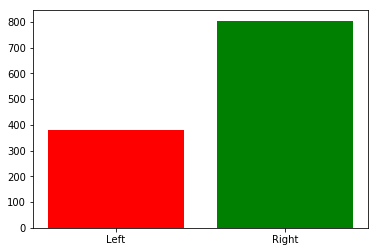

In [209]:
histo(defl, defr)

In [210]:
gkleft = pd.DataFrame(left.loc[left['role'] == {"code2": "GK", "code3": "GKP", "name": "Goalkeeper"}])
gkl = len(gkleft.index)
gkright = pd.DataFrame(right.loc[right['role'] == {"code2": "GK", "code3": "GKP", "name": "Goalkeeper"}])
gkr = len(gkright.index)
p([gkl,gkr])

13.526570048309178

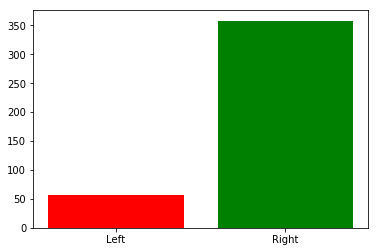

In [211]:
histo(gkl, gkr)

In [212]:
mdleft = pd.DataFrame(left.loc[left['role'] == {"code2": "MD", "code3": "MID", "name": "Midfielder"}])
mdright = pd.DataFrame(right.loc[right['role'] == {"code2": "MD", "code3": "MID", "name": "Midfielder"}])
mdl = len(mdleft.index)
mdr = len(mdright.index)
p([mdl,mdr])

22.1953188054883

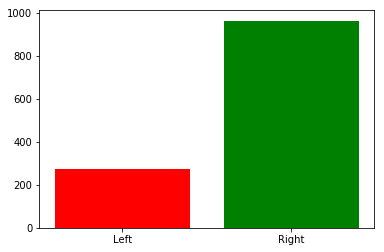

In [213]:
histo(mdl, mdr)

In [214]:
fwleft = pd.DataFrame(left.loc[left['role'] == {"code2": "FW", "code3": "FWD", "name": "Forward"}])
fwright = pd.DataFrame(right.loc[right['role'] == {"code2": "FW", "code3": "FWD", "name": "Forward"}])
fwl = len(fwleft.index)
fwr = len(fwright.index)
p([fwl,fwr])

17.796610169491526

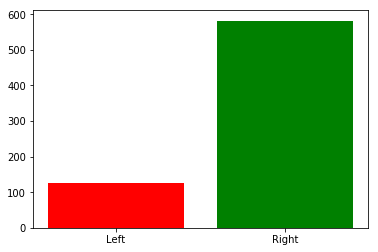

In [215]:
histo(fwl, fwr)

So, we notice that even if the percentages are all over 10%, the only roles where we can see some intersting insights are DF with 32% and MD with 22%.

The main reason might be that defenders and midfielders need to react to the actions of attackers, that are generally right-footed, and so tend to play the ball on the right side during a duel, which is the left side for an observer who is in front of the player, so on his own left.
Therefore, a player that can instictively go left is at advantage against the average stricker.

In fact, the ultimate defender, the GK, doesn't need to be left-footed to win duels, so the percentage returns to more low and common levels. 

# Core Research Questions


# [CRQ1] What are the time slots of the match with more goals?

# [CRQ2] Visualize movements and passes on the pitch!

Here we will focus our attention on the ares that a player covers during a match. In fact, for each event of the 'events' dataframe, we have a pair of coordinates that represent the starting point and the end point of an action.

This task is divided into 2 different types of visualizations, an heat map and a heat and arrow map.

### 1. Cristiano Ronaldo vs Leonél Messi

Here, we will cover only the match Barcelona - Real Madrid played on the 6 May 2018.

In [216]:
import json
from pandas.io.json import json_normalize
import seaborn as sns
from matplotlib.patches import Arc, Rectangle, ConnectionPatch


Let's define some functions that we will use later.

In [217]:
def draw_pitch(ax):
    # size of the pitch is 120, 80
    #Create figure

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black")
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[0,80], color="black")

    #Left Penalty Area
    plt.plot([14.6,14.6],[57.8,22.2],color="black")
    plt.plot([0,14.6],[57.8,57.8],color="black")
    plt.plot([0,14.6],[22.2,22.2],color="black")

    #Right Penalty Area
    plt.plot([120,105.4],[57.8,57.8],color="black")
    plt.plot([105.4,105.4],[57.8,22.5],color="black")
    plt.plot([120, 105.4],[22.5,22.5],color="black")

    #Left 6-yard Box
    plt.plot([0,4.9],[48,48],color="black")
    plt.plot([4.9,4.9],[48,32],color="black")
    plt.plot([0,4.9],[32,32],color="black")

    #Right 6-yard Box
    plt.plot([120,115.1],[48,48],color="black")
    plt.plot([115.1,115.1],[48,32],color="black")
    plt.plot([120,115.1],[32,32],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    # arguments for arc
    # x, y coordinate of centerpoint of arc
    # width, height as arc might not be circle, but oval
    # angle: degree of rotation of the shape, anti-clockwise
    # theta1, theta2, start and end location of arc in degree
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

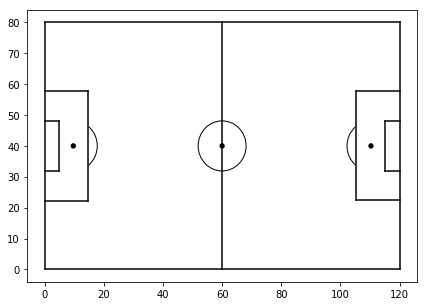

In [218]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.show()

In [219]:
#Function to plot the heat map
def green(d):
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.axis('off')
    #Coordinate of player starting position
    x_coord = [i[0]['x']*1.2 for i in d["positions"]]
    y_coord = [i[0]['y']*0.8 for i in d["positions"]]
    plt.ylim(0, 80) # need this, otherwise kde plot will go outside
    plt.xlim(0, 120)

    #shades: give us the heat map we desire
    # n_levels: draw more lines, the larger n, the more bluerry it loos
    sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30);

In [220]:
#We define the tagg function, that will create a list of all the numbers associate with 'id'
def tagg(x):
    v = []
    for i in range(len(x)):
        v.append(x.iloc[i])
    for i in range(len(v)):
        v[i] = [d['id'] for d in v[i]]
    return v

In [221]:
#Function to plot the heat map with the arrow map in the second part of the task
def calcio(d, v):
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)#We draw the field
    plt.axis('off')#We get rid of axis
    
    #These are the starting positions we need for the heat map
    x_coord = [i[0]['x']*1.2 for i in d["positions"]]
    y_coord = [i[0]['y']*0.8 for i in d["positions"]]

    for i in range(len(d)):
        # can also differentiate by color
        color = 'blue' if 1801 in v[i] else 'red'#red if pass is inaccurate
        #We print the arrows,using the start and the end positions of each event
        ax.annotate("", xy = ((d.iloc[i]['positions'][1]['x'])*1.2, (d.iloc[i]['positions'][1]['y'])*0.8), xycoords = 'data',
                   xytext = ((d.iloc[i]['positions'][0]['x'])*1.2, (d.iloc[i]['positions'][0]['y'])*0.8), textcoords = 'data',
                   arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
    #This print the heat map
    sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
    plt.ylim(0, 80) # need this, otherwise kde plot will go outside
    plt.xlim(0, 120)
    return plt.show()
    #shades: give us the heat map we desire
    # n_levels: draw more lines, the larger n, the more bluerry it loos

Let's start opening the json files and creating the dataframes that we need.

In [222]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\Matches\matches_Spain.json', 'r') as myfile:
    data = myfile.read()
m = json.loads(data)
Spain = pd.DataFrame(m)

Now, we search for the players that we need: Cristiano Ronaldo and Leonél Messi.

In [223]:
players.loc[players['firstName'] == 'Cristiano Ronaldo']

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
185,"{'name': 'Portugal', 'id': '620', 'alpha3code'...",1985-02-05,9905,3159,Cristiano Ronaldo,right,187,dos Santos Aveiro,,"{'name': 'Portugal', 'id': '620', 'alpha3code'...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",Cristiano Ronaldo,83,3322


In [224]:
players.loc[players['lastName'] == 'Messi Cuccittini']

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
207,"{'name': 'Argentina', 'id': '32', 'alpha3code'...",1987-06-24,12274,676,Lionel Andr\u00e9s,left,170,Messi Cuccittini,,"{'name': 'Spain', 'id': '724', 'alpha3code': '...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",L. Messi,72,3359


#### Let's start analyzing Cristiano Ronaldo

These are all of the Ronaldo's actions during the La Liga season.

In [225]:
criact = events.loc[events['playerId'] == 3322]
criact.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
76412,1,Duel,28.108732,189337977,2565596,1H,3322,"[{'y': 26, 'x': 96}, {'y': 27, 'x': 91}]",11,Ground attacking duel,"[{'id': 501}, {'id': 703}, {'id': 1801}]",675
76414,10,Shot,31.052085,189337978,2565596,1H,3322,"[{'y': 27, 'x': 91}, {'y': 0, 'x': 0}]",100,Shot,"[{'id': 402}, {'id': 2101}, {'id': 201}, {'id'...",675
76457,8,Pass,146.902499,189338004,2565596,1H,3322,"[{'y': 53, 'x': 68}, {'y': 67, 'x': 53}]",85,Simple pass,[{'id': 1801}],675
76589,10,Shot,548.744061,189338889,2565596,1H,3322,"[{'y': 48, 'x': 96}, {'y': 0, 'x': 0}]",100,Shot,"[{'id': 402}, {'id': 201}, {'id': 1201}, {'id'...",675
76654,1,Duel,713.899672,189338224,2565596,1H,3322,"[{'y': 84, 'x': 62}, {'y': 81, 'x': 42}]",10,Air duel,"[{'id': 702}, {'id': 1801}]",675


In [226]:
criact['eventName'].unique()

array(['Duel', 'Shot', 'Pass', 'Others on the ball', 'Foul', 'Free Kick',
       'Offside'], dtype=object)

#### Now, we consider only the 'eventName' values that we need

So, we search for: 'Duel', 'Shot', 'Pass' and 'Free Kick'.

In [227]:
a = pd.concat([criact.loc[criact['eventName'] == 'Duel'], criact.loc[criact['eventName'] == 'Shot'], criact.loc[criact['eventName'] == 'Pass'], criact.loc[criact['eventName'] == 'Free Kick']])

In [228]:
b = a.loc[a['matchId'] == 2565907]#Choosing the right match
b = b.reset_index(drop=True)#reindexing
b.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,1,Duel,68.618689,249644112,2565907,1H,3322,"[{'y': 19, 'x': 49}, {'y': 17, 'x': 49}]",13,Ground loose ball duel,"[{'id': 702}, {'id': 1801}]",675
1,1,Duel,69.411334,249644113,2565907,1H,3322,"[{'y': 17, 'x': 49}, {'y': 19, 'x': 38}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",675
2,1,Duel,114.548692,249644119,2565907,1H,3322,"[{'y': 13, 'x': 65}, {'y': 23, 'x': 53}]",12,Ground defending duel,"[{'id': 701}, {'id': 1802}]",675
3,1,Duel,275.327960,249644145,2565907,1H,3322,"[{'y': 12, 'x': 93}, {'y': 8, 'x': 97}]",11,Ground attacking duel,"[{'id': 502}, {'id': 703}, {'id': 1801}]",675
4,1,Duel,403.870069,249644178,2565907,1H,3322,"[{'y': 57, 'x': 46}, {'y': 36, 'x': 42}]",11,Ground attacking duel,"[{'id': 502}, {'id': 703}, {'id': 1801}]",675


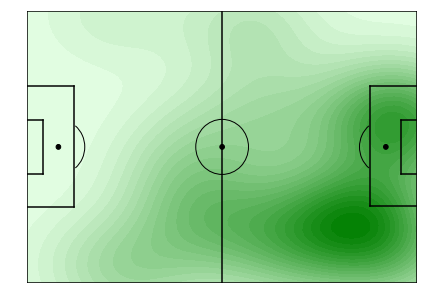

In [229]:
green(b)

#### Let's do the same analysis on Leonél Messi

In [230]:
messact = events.loc[events['playerId'] == 3359]

In [231]:
m = pd.concat([messact.loc[messact['eventName'] == 'Duel'], messact.loc[messact['eventName'] == 'Shot'], messact.loc[messact['eventName'] == 'Pass'], messact.loc[messact['eventName'] == 'Free Kick']])

In [232]:
rb = m.loc[m['matchId'] == 2565907]
rb = rb.reset_index(drop=True)
rb.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,1,Duel,122.168204,249644589,2565907,1H,3359,"[{'y': 67, 'x': 65}, {'y': 38, 'x': 63}]",11,Ground attacking duel,"[{'id': 702}, {'id': 1801}]",676
1,1,Duel,294.661951,249644634,2565907,1H,3359,"[{'y': 57, 'x': 36}, {'y': 60, 'x': 34}]",13,Ground loose ball duel,"[{'id': 701}, {'id': 1802}]",676
2,1,Duel,429.449101,249644663,2565907,1H,3359,"[{'y': 62, 'x': 42}, {'y': 57, 'x': 36}]",11,Ground attacking duel,"[{'id': 701}, {'id': 1802}]",676
3,1,Duel,432.507881,249644665,2565907,1H,3359,"[{'y': 69, 'x': 37}, {'y': 66, 'x': 41}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",676
4,1,Duel,693.128014,249644730,2565907,1H,3359,"[{'y': 43, 'x': 44}, {'y': 33, 'x': 35}]",13,Ground loose ball duel,"[{'id': 703}, {'id': 1801}]",676


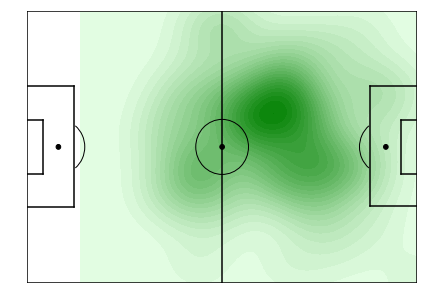

In [233]:
green(rb)

### Comments

By looking at the two plots, there are clearly strong differences:
1. Cristiano Ronaldo has been particularly active in two zones of the field, one inside and the other right outside the main area. Instead, Messi has only focused his game into the advanced midfield, a small and less dengerous place, during the match.
2. Cristiano Ronaldo has been moving all around the field, reaching areas outside his main zones.

This means that the defense of the Real Madrid was able to limit the movements of Messi and relegate him to a small area of the field, instead Cristiano Ronaldo, maybe thanks to his strenght and physique, has been a tough opponent for the Barcelona defence, in fact he managed to attack directly the goalkeeper.

### 2. Miralem Pjanic vs Jorginho
Let's start creating the Italy dataset, since Juventus and Napoli are two teams of Serie A.

In [234]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\Matches\matches_Italy.json', 'r') as myfile:
    data = myfile.read()
i = json.loads(data)
Italy = pd.DataFrame(i)
Italy.head()

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,524,"May 20, 2018 at 8:45:00 PM GMT+2",2018-05-20 18:45:00,Regular,38,"Lazio - Internazionale, 2 - 3","[{'refereeId': 377206, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3162': {'scoreET': 0, 'coachId': 251025, 'si...",,3161,2576335
1,524,"May 20, 2018 at 8:45:00 PM GMT+2",2018-05-20 18:45:00,Regular,38,"Sassuolo - Roma, 0 - 1","[{'refereeId': 377255, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3158': {'scoreET': 0, 'coachId': 210119, 'si...",MAPEI Stadium - Citt\u00e0 del Tricolore,3158,2576336
2,524,"May 20, 2018 at 6:00:00 PM GMT+2",2018-05-20 16:00:00,Regular,38,"Cagliari - Atalanta, 1 - 0","[{'refereeId': 377247, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3173': {'scoreET': 0, 'coachId': 251044, 'si...",,3173,2576329
3,524,"May 20, 2018 at 6:00:00 PM GMT+2",2018-05-20 16:00:00,Regular,38,"Chievo - Benevento, 1 - 0","[{'refereeId': 377246, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3165': {'scoreET': 0, 'coachId': 272970, 'si...",,3165,2576330
4,524,"May 20, 2018 at 6:00:00 PM GMT+2",2018-05-20 16:00:00,Regular,38,"Udinese - Bologna, 1 - 0","[{'refereeId': 377254, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3166': {'scoreET': 0, 'coachId': 20481, 'sid...",,3163,2576331


We need the wyId code to find this match even in 'events' dataset, to choose the players actions of the right match.

In [235]:
Italy.loc[Italy['label'] == 'Juventus - Napoli, 0 - 1']

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
41,524,"April 22, 2018 at 8:45:00 PM GMT+2",2018-04-22 18:45:00,Regular,34,"Juventus - Napoli, 0 - 1","[{'refereeId': 377206, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",,3187,2576295


The match Juventus - Napoli has wyId: 2576295

#### Miralem Pjanic plot of passes

Now we can search for the player Miralem Pjanic in the 'players' dataset, we need his wyId code.

In [236]:
pia = players.loc[players['firstName'] == 'Miralem']
pia

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
1482,"{'name': 'Bosnia-Herzegovina', 'id': '70', 'al...",1990-04-02,null,3159,Miralem,right,180,Pjani\u0107,,"{'name': 'Luxembourg', 'id': '442', 'alpha3cod...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",M. Pjani\u0107,74,20443


#### Making the heat-arrow plot

In [237]:
#Opening and loading the json file 'events_Italy'
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\Events\events_Italy.json', 'r') as myfile:
    data = myfile.read()
evit = json.loads(data)
Itaev = pd.DataFrame(evit)#Creating a pandas dataframe

In [238]:
#These are all the passes of Pjanic during the match
Pjanic = Itaev.loc[(Itaev['matchId'] == 2576295) & (Itaev['playerId'] == 20443) & (Itaev['eventName'] == 'Pass')]
Pjanic.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
573105,8,Pass,26.160914,245487395,2576295,1H,20443,"[{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]",85,Simple pass,[{'id': 1801}],3159
573107,8,Pass,33.120179,245487399,2576295,1H,20443,"[{'y': 30, 'x': 31}, {'y': 84, 'x': 31}]",83,High pass,[{'id': 1801}],3159
573126,8,Pass,120.169376,245487410,2576295,1H,20443,"[{'y': 62, 'x': 63}, {'y': 47, 'x': 63}]",85,Simple pass,"[{'id': 1401}, {'id': 1801}]",3159
573220,8,Pass,352.941005,245487509,2576295,1H,20443,"[{'y': 26, 'x': 25}, {'y': 0, 'x': 31}]",85,Simple pass,"[{'id': 1401}, {'id': 1001}, {'id': 1802}]",3159
573225,8,Pass,432.992312,245487518,2576295,1H,20443,"[{'y': 51, 'x': 26}, {'y': 76, 'x': 13}]",85,Simple pass,[{'id': 1801}],3159


In this visualization, we will plot the heat map and the arrow map concurrently, highlightning the accurate passes and the inaccurate ones.

In [239]:
tag = Pjanic['tags']#This is the 'tags' column that we will transform into a list of values
tag.head()

573105                                [{'id': 1801}]
573107                                [{'id': 1801}]
573126                  [{'id': 1401}, {'id': 1801}]
573220    [{'id': 1401}, {'id': 1001}, {'id': 1802}]
573225                                [{'id': 1801}]
Name: tags, dtype: object

In [240]:
v = tagg(tag)#Function described above
v[:5]

[[1801], [1801], [1401, 1801], [1401, 1001, 1802], [1801]]

Now, we can verify if a pass has been accurate or not by looking at the tag number 1801 for each event.

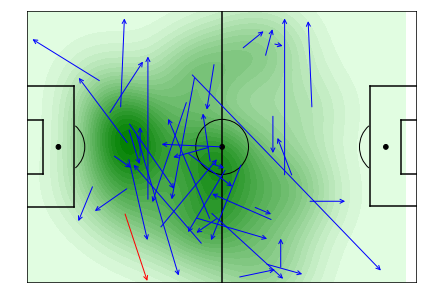

In [241]:
calcio(Pjanic,v)#As explained in the definition of this function, the blue arrows are accurate passes, while the red ones are inaccurate.

#### Jorginho plot of passes

In [242]:
jor = players.loc[players['firstName'] == 'Jorge Luiz'] #Searching for the wyId code of the player
jor

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
1658,"{'name': 'Brazil', 'id': '76', 'alpha3code': '...",1991-12-20,3757,3187,Jorge Luiz,right,180,Frello Filho,,"{'name': 'Italy', 'id': '380', 'alpha3code': '...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",Jorginho,65,21315


In [243]:
#Choosing only the event 'Pass'
Jorginho = Itaev.loc[(Itaev['matchId'] == 2576295) & (Itaev['playerId'] == 21315) & (Itaev['eventName'] == 'Pass')]
Jorginho.head() 

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
573145,8,Pass,166.338197,245487404,2576295,1H,21315,"[{'y': 75, 'x': 47}, {'y': 71, 'x': 62}]",85,Simple pass,[{'id': 1801}],3187
573164,8,Pass,206.466357,245487433,2576295,1H,21315,"[{'y': 44, 'x': 71}, {'y': 42, 'x': 69}]",82,Head pass,"[{'id': 1401}, {'id': 1802}]",3187
573188,8,Pass,250.114192,245487461,2576295,1H,21315,"[{'y': 72, 'x': 47}, {'y': 96, 'x': 61}]",85,Simple pass,[{'id': 1801}],3187
573231,8,Pass,446.557147,245487500,2576295,1H,21315,"[{'y': 28, 'x': 57}, {'y': 33, 'x': 77}]",85,Simple pass,[{'id': 1801}],3187
573237,8,Pass,456.587989,245487506,2576295,1H,21315,"[{'y': 25, 'x': 61}, {'y': 13, 'x': 74}]",85,Simple pass,[{'id': 1801}],3187


In [244]:
tagj = Jorginho['tags']
tagj.head()

573145                  [{'id': 1801}]
573164    [{'id': 1401}, {'id': 1802}]
573188                  [{'id': 1801}]
573231                  [{'id': 1801}]
573237                  [{'id': 1801}]
Name: tags, dtype: object

In [245]:
w = tagg(tagj)
w[:5]

[[1801], [1401, 1802], [1801], [1801], [1801]]

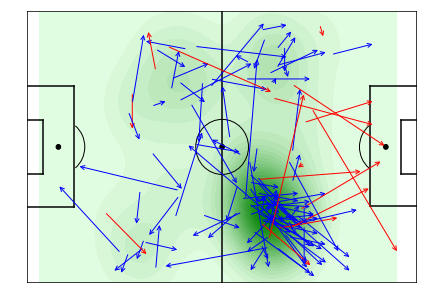

In [246]:
calcio(Jorginho,w)#As explained in the definition of this function, the blue arrows are accurate passes, while the red ones are inaccurate.

### Comments

By looking at the heat maps, we can clearly notice that even if both are midfielders, Jorginho is in a much more advanced position than Pjanic. The difference in the number of passes between the two players is once again on Jorginho's side, even though Pjanic manages to overcome it in terms of precision, with only one inaccurate pass. However, all the inaccurate passages of Jorginho are at least towards the attack area, while Pjanic not only never approached there, but none of his passes seems to be able to reach the area. So, going to look at the game statistics linked to the track of this exercise, we observe a 60% possession of Napoli, and one of 40% of Juventus, therefore, since the victory belongs to Napoli, perhaps it would have been better to concentrate on the quantity of forward passes, and not just on their accuracy.